## ✅ Step 1: Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## ✅ Step 2: Load the Dataset

In [3]:
# Load the dataset (adjust path if needed)
df = pd.read_csv("churn.csv")

# Show the first few rows
df.head()


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1.0,22.0,Female,25.0,14.0,4.0,27.0,Basic,Monthly,598.0,9.0,1.0
1,2.0,41.0,Female,28.0,28.0,7.0,13.0,Standard,Monthly,584.0,20.0,0.0
2,3.0,47.0,Male,27.0,10.0,2.0,29.0,Premium,Annual,757.0,21.0,0.0
3,4.0,35.0,Male,9.0,12.0,5.0,17.0,Premium,Quarterly,232.0,18.0,0.0
4,5.0,53.0,Female,58.0,24.0,9.0,2.0,Standard,Annual,533.0,18.0,0.0


## Exploratory Data Analysis (EDA) 

In [4]:
# Overview of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


In [5]:
# Statistical summary of numeric columns
df.describe()


,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [6]:
# Check for missing values
df.isnull().sum()


CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

### ✅  Value Counts for Categorical Columns

In [7]:
# Unique values in categorical columns
print("Gender:\n", df['Gender'].value_counts())
print("\nSubscription Type:\n", df['Subscription Type'].value_counts())
print("\nContract Length:\n", df['Contract Length'].value_counts())
print("\nChurn:\n", df['Churn'].value_counts())


Gender:
 Gender
Male      280273
Female    224933
Name: count, dtype: int64

Subscription Type:
 Subscription Type
Standard    170630
Premium     170099
Basic       164477
Name: count, dtype: int64

Contract Length:
 Contract Length
Annual       198608
Quarterly    197364
Monthly      109234
Name: count, dtype: int64

Churn:
 Churn
1.0    280492
0.0    224714
Name: count, dtype: int64


## ✅  Visualize the Target Variable (Churn)

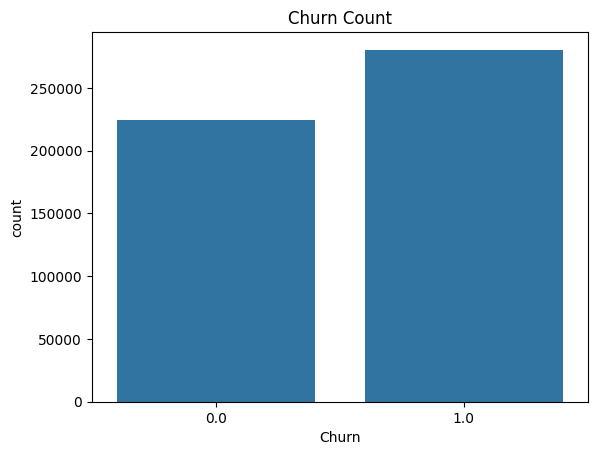

In [8]:
# Churn distribution
sns.countplot(x='Churn', data=df)
plt.title("Churn Count")
plt.show()


### ✅  Visualize Categorical Features vs Churn

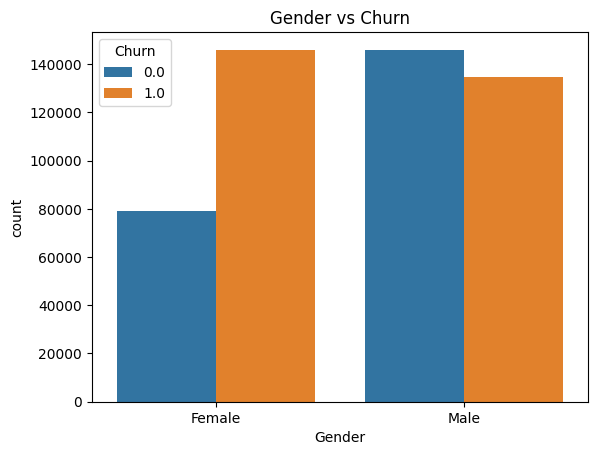

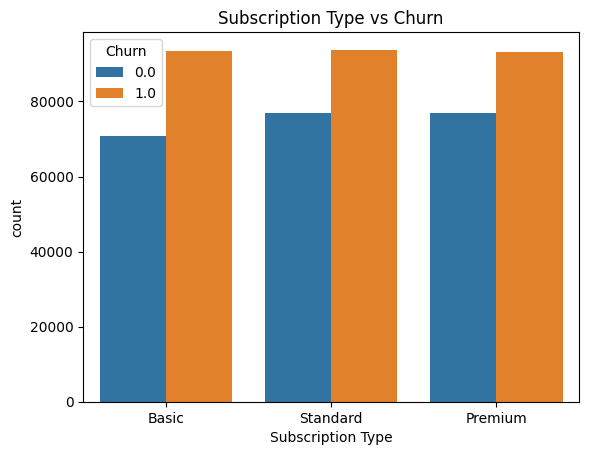

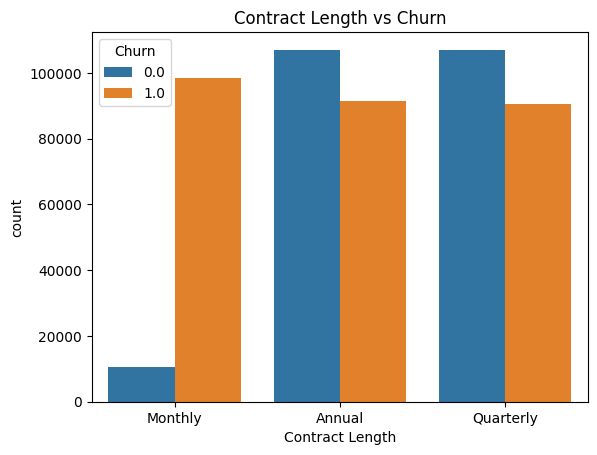

In [9]:
# Gender vs Churn
sns.countplot(x='Gender', hue='Churn', data=df)
plt.title("Gender vs Churn")
plt.show()

# Subscription Type vs Churn
sns.countplot(x='Subscription Type', hue='Churn', data=df)
plt.title("Subscription Type vs Churn")
plt.show()

# Contract Length vs Churn
sns.countplot(x='Contract Length', hue='Churn', data=df)
plt.title("Contract Length vs Churn")
plt.show()


### ✅  Visualize Numeric Features with Boxplots

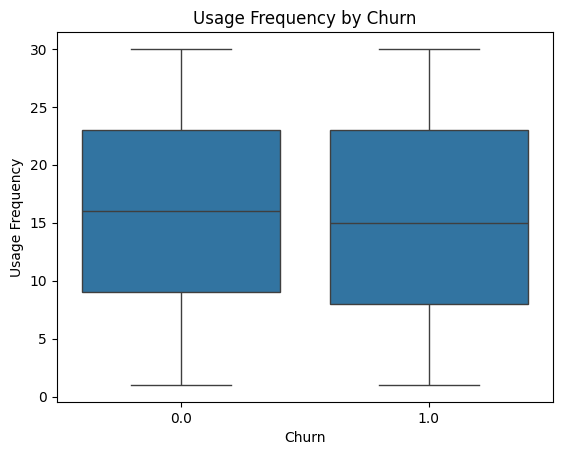

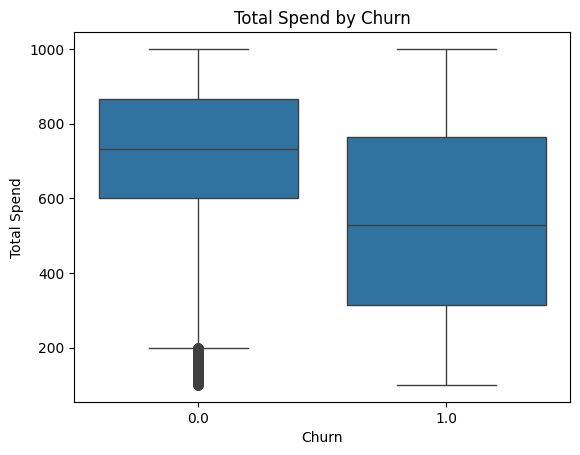

In [10]:
# Usage Frequency vs Churn
sns.boxplot(x='Churn', y='Usage Frequency', data=df)
plt.title("Usage Frequency by Churn")
plt.show()

# Total Spend vs Churn
sns.boxplot(x='Churn', y='Total Spend', data=df)
plt.title("Total Spend by Churn")
plt.show()


### ✅  Correlation Matrix

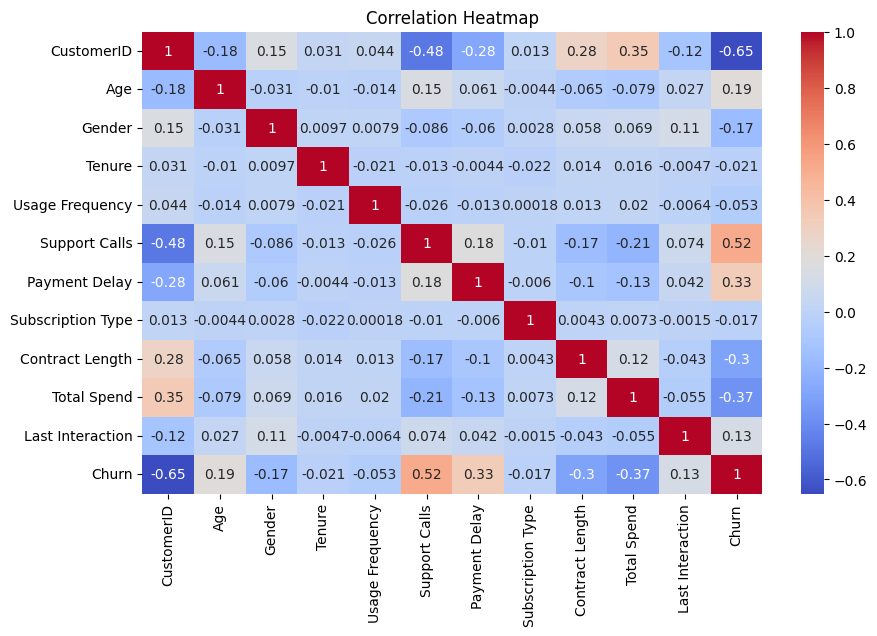

In [11]:
# Convert categorical to numeric temporarily for correlation
df_temp = df.copy()
df_temp['Gender'] = df_temp['Gender'].map({'Male': 1, 'Female': 0})
df_temp['Subscription Type'] = df_temp['Subscription Type'].map({'Basic': 0, 'Standard': 1, 'Premium': 2})
df_temp['Contract Length'] = df_temp['Contract Length'].map({'Monthly': 0, 'Quarterly': 1, 'Annual': 2})

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_temp.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## Data Wrangling

In [12]:
df.duplicated().sum() #check the duplicated

0

In [13]:
df.isnull().sum() #check null value

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [14]:
df=df.dropna() #remove null value

In [15]:
df.isnull().sum() #check null value

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [68]:
df.drop(columns=['CustomerID'], inplace=True) # remove unnecessory column

In [16]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1.0,22.0,Female,25.0,14.0,4.0,27.0,Basic,Monthly,598.0,9.0,1.0
1,2.0,41.0,Female,28.0,28.0,7.0,13.0,Standard,Monthly,584.0,20.0,0.0
2,3.0,47.0,Male,27.0,10.0,2.0,29.0,Premium,Annual,757.0,21.0,0.0
3,4.0,35.0,Male,9.0,12.0,5.0,17.0,Premium,Quarterly,232.0,18.0,0.0
4,5.0,53.0,Female,58.0,24.0,9.0,2.0,Standard,Annual,533.0,18.0,0.0


### check ouliers outliers using boxplot

<Axes: ylabel='Age'>

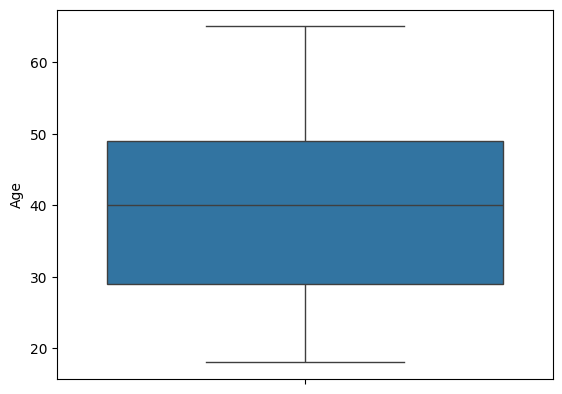

In [19]:
sns.boxplot(y='Age' ,data=df)

<Axes: ylabel='Total Spend'>

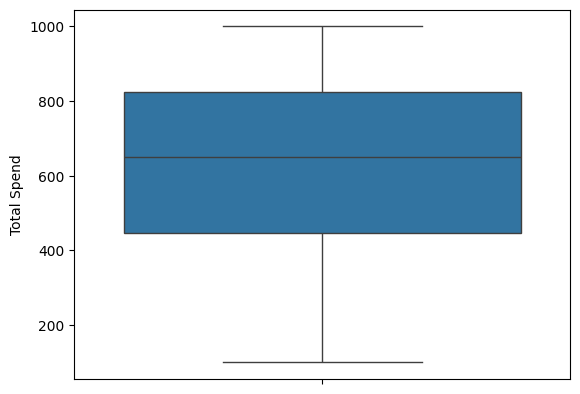

In [20]:
sns.boxplot(y='Total Spend' ,data=df)

### Encode categorical columns

In [69]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical columns
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Subscription Type'] = le.fit_transform(df['Subscription Type'])
df['Contract Length'] = le.fit_transform(df['Contract Length'])

In [70]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22.0,0,25.0,14.0,4.0,27.0,0,1,598.0,9.0,1.0
1,41.0,0,28.0,28.0,7.0,13.0,2,1,584.0,20.0,0.0
2,47.0,1,27.0,10.0,2.0,29.0,1,0,757.0,21.0,0.0
3,35.0,1,9.0,12.0,5.0,17.0,1,2,232.0,18.0,0.0
4,53.0,0,58.0,24.0,9.0,2.0,2,0,533.0,18.0,0.0


In [71]:
df['Last Interaction'].unique()

array([ 9., 20., 21., 18., 29., 14., 16.,  8., 10.,  3.,  1., 24., 30.,
       15., 25., 22., 13., 26., 12.,  4., 27.,  6., 17., 19.,  5.,  2.,
       11.,  7., 28., 23.])

### Features/Target split

In [72]:
# Feature/Target split
X = df.drop("Churn", axis=1)
y = df["Churn"]

### Normalize/scale Data

In [73]:
# Normalize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### train test split

In [76]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Train Model Using Xgboost

In [77]:
from xgboost import XGBClassifier
model= XGBClassifier( eval_metric='logloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

## Evaluate Model

In [79]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Predict on test set
y_pred = model.predict(X_test)

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Individual Metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))




Confusion Matrix:
 [[38716  6370]
 [  346 55610]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.86      0.92     45086
         1.0       0.90      0.99      0.94     55956

    accuracy                           0.93    101042
   macro avg       0.94      0.93      0.93    101042
weighted avg       0.94      0.93      0.93    101042

Accuracy Score: 0.9335325904079491
Precision: 0.8972249112616973
Recall: 0.9938165701622703
F1 Score: 0.9430538597205264


## 📊 Model Evaluation Report

### ✅ Confusion Matrix

[[38716 6370]
[ 346 55610]]

- **True Negatives (TN)** = 38716  
- **False Positives (FP)** = 6370  
- **False Negatives (FN)** = 346  
- **True Positives (TP)** = 55610

---

### 📋 Classification Report

| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| **0.0** | 0.99 | 0.86 | 0.92 | 45086 |
| **1.0** | 0.90 | 0.99 | 0.94 | 55956 |

- **Accuracy**: 0.9335  
- **Macro Avg**: Precision = 0.94, Recall = 0.93, F1-score = 0.93  
- **Weighted Avg**: Precision = 0.94, Recall = 0.93, F1-score = 0.93

---

### 📈 Individual Metrics

- **Accuracy Score**: `0.9335`
- **Precision**: `0.8972`
- **Recall**: `0.9938`
- **F1 Score**: `0.9431`

---

### ✅ Interpretation

- The model performs **very well** with an overall **accuracy of ~93.35%**.
- It shows **excellent recall (99.38%)** for the positive class (churn = 1.0), which is crucial in churn prediction.
- Slight trade-off in **precision (89.72%)** indicates some false positives, but overall balance is good as reflected by the **F1 score of 94.31%**.



## Apply SMOTE (Synthetic Minority Oversampling Technique) for imbalance data to balance data

## Import Libraries

In [80]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, precision_score, recall_score, f1_score,
                             precision_recall_curve)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


## Load and Split Data

In [81]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


###  Apply SMOTE (to training data only)

In [82]:
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print("After SMOTE:", np.bincount(y_train_smote))


After SMOTE: [196344 196344]


### Train XGBClassifier

In [89]:
model = XGBClassifier(
    eval_metric='logloss',
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    n_estimators=100,
    random_state=42,
    early_stopping_rounds=10 
)

model.fit(X_train_smote, y_train_smote,
          eval_set=[(X_test, y_test)],
          verbose=False)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

### Predict Probabilities


In [91]:

y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1


## Threshold Tuning use To balance between precision and recall

## 🎯 Threshold Tuning: Used to Balance Between Precision and Recall

### 📌 What is Threshold Tuning?

Machine learning models often output probabilities (like 0.72), not just "yes" or "no".

**Threshold tuning** means choosing the cutoff point (like 0.5 or 0.6) at which the model decides:
- "Yes" (positive class)
- "No" (negative class)

---

### ⚖️ Why is it Important?

By changing the threshold, you can **balance between:**

- **Precision** (How many predicted positives were actually correct?)
- **Recall** (How many actual positives did the model catch?)

---

### 🔁 Trade-Off Example

| Threshold | Precision | Recall | Explanation                        |
|-----------|-----------|--------|------------------------------------|
| 0.3       | Low       | High   | Catches more positives but with more false alarms |
| 0.7       | High      | Low    | Safer predictions, but may miss real positives |

---

### ✅ When to Use Threshold Tuning

- When **false positives** or **false negatives** are costly.
- When you want to find the **best balance** between catching all positives and avoiding incorrect alerts.
- Especially useful for **imbalanced datasets** like churn, fraud, or disease detection.

---

### 📊 Tip:

Always use a **Precision–Recall vs Threshold plot** to visually find the best point for your business goals.


In [93]:
# Threshold tuning using F1 and automaticaly Threshold choose
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"\n✅ Best Threshold for F1: {best_threshold:.4f}")


✅ Best Threshold for F1: 0.1378


### Predict using best threshold

In [94]:
# Predict using best threshold
y_pred_thresh = (y_probs >= best_threshold).astype(int)

### Evaluate the model using metrics

In [95]:


# Evaluate
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
print("\nClassification Report:\n", classification_report(y_test, y_pred_thresh))
print("Accuracy Score:", accuracy_score(y_test, y_pred_thresh))
print("Precision:", precision_score(y_test, y_pred_thresh))
print("Recall:", recall_score(y_test, y_pred_thresh))
print("F1 Score:", f1_score(y_test, y_pred_thresh))


Confusion Matrix:
 [[57303 10111]
 [  301 83847]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.85      0.92     67414
         1.0       0.89      1.00      0.94     84148

    accuracy                           0.93    151562
   macro avg       0.94      0.92      0.93    151562
weighted avg       0.94      0.93      0.93    151562

Accuracy Score: 0.9313020414087964
Precision: 0.89238808829477
Recall: 0.996422969054523
F1 Score: 0.9415404309793045


## 📊 Model Performance Comparison: Before vs After SMOTE + Threshold Tuning

### ✅ Confusion Matrix

| Condition           | True Negatives | False Positives | False Negatives | True Positives |
|---------------------|----------------|------------------|------------------|----------------|
| **Before (No SMOTE / Threshold)** | 38,716          | 6,370            | 346             | 55,610         |
| **After (SMOTE + Threshold)**     | 57,303          | 10,111           | 301             | 83,847         |

---

### 📋 Classification Metrics

| Metric         | Before (No SMOTE / Threshold) | After (SMOTE + Threshold) |
|----------------|-------------------------------|----------------------------|
| **Accuracy**   | 0.9335                        | 0.9313                     |
| **Precision**  | 0.8972                        | 0.8924                     |
| **Recall**     | 0.9938 ✅                     | 0.9964 ✅                  |
| **F1 Score**   | 0.9431                        | 0.9415                     |

---

### 📌 Summary

- ✅ **Recall improved slightly** after SMOTE and threshold tuning (from **0.9938** → **0.9964**), meaning the model **misses fewer actual churners**.
- ⚖️ **Precision decreased slightly** (from **0.8972** → **0.8924**), meaning **slightly more false positives**.
- 🎯 **F1 Score stayed high**, indicating a strong balance between precision and recall in both cases.
- 🧠 **SMOTE** helped balance the class distribution, while **threshold tuning** optimized classification based on your business needs.

---

### ✅ Recommendation

If your business goal is to **catch nearly all churners**, the **SMOTE + Threshold model** is more robust due to:
- Higher **recall**
- Similar **F1 score**
- Acceptable trade-off in **precision**



In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, precision_recall_curve, f1_score
import joblib
import numpy as np
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load and clean data
df = pd.read_csv("churn.csv")
df = df.dropna()

df.drop(columns=[ "CustomerID"], inplace=True)
gender_encoder = LabelEncoder()
df["Gender"] = gender_encoder.fit_transform(df["Gender"])

subscription_encoder = LabelEncoder()
df["Subscription Type"] = subscription_encoder.fit_transform(df["Subscription Type"])

contract_encoder = LabelEncoder()
df["Contract Length"] = contract_encoder.fit_transform(df["Contract Length"])

# Save the encoders for later use
joblib.dump(gender_encoder, "gender_encoder.pkl")
joblib.dump(subscription_encoder, "subscriptiontype_encoder.pkl")
joblib.dump(contract_encoder, "contractlength_encoder.pkl")

# Split features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Check class distribution
print("Class distribution:", Counter(y))

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Handle class imbalance using SMOTE
print("Before SMOTE:", Counter(y_train))
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("After SMOTE:", Counter(y_train_res))




# Train model with optimized parameters
model = XGBClassifier(
    eval_metric='logloss',
    scale_pos_weight=0.8,  # Optional alternative to SMOTE
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    n_estimators=100,
    random_state=42,
    early_stopping_rounds=10  # Moved this here from fit()
)

# Fit with evaluation set
model.fit(
    X_train_res, y_train_res,
    eval_set=[(X_test, y_test)],
    verbose= False
)

# Feature importance
print("\nFeature Importance:")
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)
print(importance)

# Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Threshold tuning using F1
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"\n Best Threshold for F1: {best_threshold:.4f}")

# Predict using best threshold
y_pred_thresh = (y_proba >= best_threshold).astype(int)

# Evaluate
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
print("\nClassification Report:\n", classification_report(y_test, y_pred_thresh))
print("Accuracy Score:", accuracy_score(y_test, y_pred_thresh))
print("Precision:", precision_score(y_test, y_pred_thresh))
print("Recall:", recall_score(y_test, y_pred_thresh))
print("F1 Score:", f1_score(y_test, y_pred_thresh))

# Save model, scaler, encoders, and threshold
model.save_model("xgb_churn_model.json")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(best_threshold, "best_threshold.pkl")

print("\n Model, Scaler, Encoders, and Best Threshold saved successfully!")

Class distribution: Counter({1.0: 280492, 0.0: 224714})
Before SMOTE: Counter({1.0: 224393, 0.0: 179771})
After SMOTE: Counter({1.0: 224393, 0.0: 224393})
[0]	validation_0-logloss:0.65210
[1]	validation_0-logloss:0.60799
[2]	validation_0-logloss:0.56648
[3]	validation_0-logloss:0.52586
[4]	validation_0-logloss:0.49500
[5]	validation_0-logloss:0.46620
[6]	validation_0-logloss:0.44433
[7]	validation_0-logloss:0.42503
[8]	validation_0-logloss:0.40477
[9]	validation_0-logloss:0.38908
[10]	validation_0-logloss:0.37511
[11]	validation_0-logloss:0.36166
[12]	validation_0-logloss:0.34794
[13]	validation_0-logloss:0.33766
[14]	validation_0-logloss:0.32890
[15]	validation_0-logloss:0.31890
[16]	validation_0-logloss:0.31116
[17]	validation_0-logloss:0.30450
[18]	validation_0-logloss:0.29871
[19]	validation_0-logloss:0.29214
[20]	validation_0-logloss:0.28770
[21]	validation_0-logloss:0.28337
[22]	validation_0-logloss:0.27992
[23]	validation_0-logloss:0.27587
[24]	validation_0-logloss:0.27305
[25]	

# Test the model

In [107]:
import pandas as pd
import joblib
from xgboost import XGBClassifier

# Load scaler, model, and threshold
scaler = joblib.load("scaler.pkl")
best_threshold = joblib.load("best_threshold.pkl")

# Load label encoders
contract_encoder = joblib.load("contractlength_encoder.pkl")
gender_encoder = joblib.load("gender_encoder.pkl")
subscription_encoder = joblib.load("subscriptiontype_encoder.pkl")

# Load XGBoost model
model = XGBClassifier()
model.load_model("xgb_churn_model.json")

# Define feature names in training order
columns = [
    "Age", "Gender", "Tenure", "Usage Frequency", "Support Calls",
    "Payment Delay", "Subscription Type", "Contract Length",
    "Total Spend", "Last Interaction"
]

raw_input = {
    "Age": 30,
    "Gender": "Female",  # or "Female"
    "Tenure": 24,
    "Usage Frequency": 5.0,
    "Support Calls": 0,
    "Payment Delay": 0.0,
    "Subscription Type": "Basic",  # or "Basic", "Premium"
    "Contract Length": "Annual",  # or "Monthly", "Quarterly"
    "Total Spend": 20000.0,
    "Last Interaction": 30
}



# Encode categorical values using the loaded encoders
encoded_input = [
    raw_input["Age"],
    gender_encoder.transform([raw_input["Gender"]])[0],
    raw_input["Tenure"],
    raw_input["Usage Frequency"],
    raw_input["Support Calls"],
    raw_input["Payment Delay"],
    subscription_encoder.transform([raw_input["Subscription Type"]])[0],
    contract_encoder.transform([raw_input["Contract Length"]])[0],
    raw_input["Total Spend"],
    raw_input["Last Interaction"]
]

# Convert to DataFrame
input_df = pd.DataFrame([encoded_input], columns=columns)

# Scale input
scaled_input = scaler.transform(input_df)

# Predict probability of churn
proba = model.predict_proba(scaled_input)[:, 1]

# Apply custom threshold
prediction = (proba >= best_threshold).astype(int)
# Output
print("Churn Probability:", round(proba[0]*100, 2), "%")
print("Prediction:", "Churn" if prediction[0] == 1 else "Not Churn")    


Churn Probability: 63.17 %
Prediction: Churn


In [101]:
import pandas as pd
import joblib
from xgboost import XGBClassifier
import numpy as np

# Load scaler, model, and threshold
scaler = joblib.load("scaler.pkl")
best_threshold = joblib.load("best_threshold.pkl")

# Fix threshold in case it's an array
threshold = float(best_threshold) if isinstance(best_threshold, (np.ndarray, list, tuple)) else best_threshold

# Load label encoders
contract_encoder = joblib.load("contractlength_encoder.pkl")
gender_encoder = joblib.load("gender_encoder.pkl")
subscription_encoder = joblib.load("subscriptiontype_encoder.pkl")

# Load XGBoost model
model = XGBClassifier()
model.load_model("xgb_churn_model.json")

# Define feature names in training order
columns = [
    "Age", "Gender", "Tenure", "Usage Frequency", "Support Calls",
    "Payment Delay", "Subscription Type", "Contract Length",
    "Total Spend", "Last Interaction"
]

# 🔁 Updated example input (user-style)
raw_input = {
    "Age": 45,
    "Gender": "Female",
    "Tenure": 2,
    "Usage Frequency": 3.5,
    "Support Calls": 4,
    "Payment Delay": 10.0,
    "Subscription Type": "Basic",
    "Contract Length": "Monthly",
    "Total Spend": 300.0,
    "Last Interaction": 40
}

# Encode categorical values
encoded_input = [
    raw_input["Age"],
    gender_encoder.transform([raw_input["Gender"]])[0],
    raw_input["Tenure"],
    raw_input["Usage Frequency"],
    raw_input["Support Calls"],
    raw_input["Payment Delay"],
    subscription_encoder.transform([raw_input["Subscription Type"]])[0],
    contract_encoder.transform([raw_input["Contract Length"]])[0],
    raw_input["Total Spend"],
    raw_input[ "Last Interaction"]
]

# Convert to DataFrame
input_df = pd.DataFrame([encoded_input], columns=columns)


# Scale input
scaled_input = scaler.transform(input_df)

# Predict probability of churn
proba = model.predict_proba(scaled_input)[:, 1]

# Apply custom threshold
prediction = (proba >= threshold).astype(int)

# Output
print("Churn Probability:", round(proba[0] * 100, 2), "%")
print("Prediction:", "Churn" if prediction[0] == 1 else "Not Churn")


Churn Probability: 78.59 %
Prediction: Churn


In [102]:
import pandas as pd
import joblib
from xgboost import XGBClassifier
import numpy as np

# Load scaler, model, and threshold
scaler = joblib.load("scaler.pkl")
best_threshold = joblib.load("best_threshold.pkl")

# Fix threshold in case it's an array
threshold = float(best_threshold) if isinstance(best_threshold, (np.ndarray, list, tuple)) else best_threshold

# Load label encoders
contract_encoder = joblib.load("contractlength_encoder.pkl")
gender_encoder = joblib.load("gender_encoder.pkl")
subscription_encoder = joblib.load("subscriptiontype_encoder.pkl")

# Load XGBoost model
model = XGBClassifier()
model.load_model("xgb_churn_model.json")

# Define feature names in training order
columns = [
    "Age", "Gender", "Tenure", "Usage Frequency", "Support Calls",
    "Payment Delay", "Subscription Type", "Contract Length",
    "Total Spend", "Last Interaction"
]

# 🔁 Updated example input (user-style)
raw_input = {
    "Age": 30,
    "Gender": "Male",
    "Tenure": 24,
    "Usage Frequency": 5,
    "Support Calls": 0,
    "Payment Delay": 0,
    "Subscription Type": "Premium",
    "Contract Length": "Annual",
    "Total Spend": 2400,
    "Last Interaction": 2
}

# Encode categorical values
encoded_input = [
    raw_input["Age"],
    gender_encoder.transform([raw_input["Gender"]])[0],
    raw_input["Tenure"],
    raw_input["Usage Frequency"],
    raw_input["Support Calls"],
    raw_input["Payment Delay"],
    subscription_encoder.transform([raw_input["Subscription Type"]])[0],
    contract_encoder.transform([raw_input["Contract Length"]])[0],
    raw_input["Total Spend"],
    raw_input["Last Interaction"]
]


# Convert to DataFrame
input_df = pd.DataFrame([encoded_input], columns=columns)



# Scale input
scaled_input = scaler.transform(input_df)

# Predict probability of churn
proba = model.predict_proba(scaled_input)[:, 1]

# Apply custom threshold
prediction = (proba >= threshold).astype(int)

# Output
print("Churn Probability:", round(proba[0] * 100, 2), "%")
print("Prediction:", "Churn" if prediction[0] == 1 else "Not Churn")

Churn Probability: 3.7 %
Prediction: Not Churn
